In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras 
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, InputLayer
import cv2
import random
random.seed(0)
np.random.seed(0)
%matplotlib inline

In [2]:
def resize_image(image_array):
    return cv2.resize(image_array,(224,224))

In [3]:
def read_image(image_path):
    return plt.imread(image_path)

In [4]:
def rescale_image(image_array):
    return image_array*1./255

In [5]:
def plot_image(image_array):
    try:
        plt.imshow(image_array)
    except:
        plt.imshow(image_array[0])

In [6]:
def preprocess_image(image_path,reshape = True):
    image = read_image(image_path)
    image = resize_image(image)
    image = rescale_image(image)
    if(reshape ==  True):
        image = image.reshape(-1,image.shape[0],image.shape[1],image.shape[2])    
    return image

In [7]:
def preprocess_imageslist(image_list):
    imagelist = np.array([preprocess_image(img,reshape=False) for img in image_list])
    return imagelist

In [8]:
def build_model():
    keras.backend.clear_session()
    vgg = keras.applications.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
    vggmodel = keras.Sequential([vgg
                             ,Dense(1000,activation='tanh'),Dense(1000,activation='tanh'),Dense(1000,activation='tanh'),Dense(5,activation='softmax')])

    vggmodel.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
    
    vggmodel.load_weights('C:\\Users\\dell\\Downloads\\vggmodelweight.h5')
    vggmodel.trainable=False
    
    return vggmodel

In [9]:
def predict_and_plot(image,model):
    pred_dict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"}
    plt.imshow(image[0])
    prediction = model.predict(image) 
    pred = pred_dict[np.argmax(prediction)]
    plt.title(pred)

In [10]:
def predict_and_plot5(imagelist,model):
    pred_dict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"}
    plt.figure(figsize=(20,10))
    for num,image in enumerate(imagelist):
        plt.subplot(1,5,num+1)
        plt.imshow(image)
        prediction = model.predict(image.reshape(-1,224,224,3)) 
        pred = pred_dict[np.argmax(prediction)]
        plt.title(pred)
        

# Model evaluation

In [38]:
get_image_path = 'D:\\SIH\\Ann-Aztecs\\satimage\\20203872005.jpeg'  # enter image path

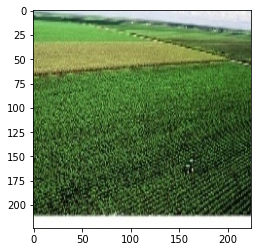

In [39]:
image1 = preprocess_image(get_image_path)
plot_image(image1)

In [34]:
model = build_model()

In [35]:
model.predict(image1)

array([[1.0645469e-03, 9.9470323e-01, 1.7413346e-05, 4.2000576e-03,
        1.4701284e-05]], dtype=float32)

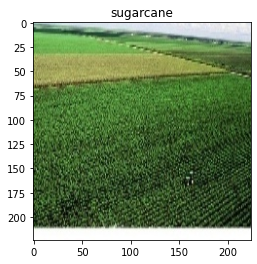

In [40]:
predict_and_plot(image1,model = model)

In [16]:
get_image_list = ["jute-field.jpg","maize-field.jpg","rice-field.jpg","sugarcane-field.jpg","wheat-field-395545_960_720.jpg"] # enter five image path 

In [17]:
images = preprocess_imageslist(get_image_list)

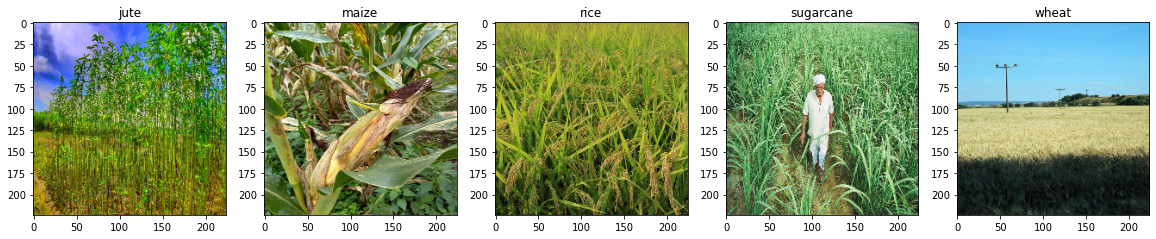

In [18]:
predict_and_plot5(images,model=model)

In [27]:
mainpath="D:\SIH\\Ann-Aztecs\\satimage"
imagelist = [20203872001,20203872002,20203872003,20203872004,20203872005]
imagelist=[os.path.join(mainpath,(str(i)+".jpeg")) for i in imagelist]
print(imagelist)

['D:\\SIH\\Ann-Aztecs\\satimage\\20203872001.jpeg', 'D:\\SIH\\Ann-Aztecs\\satimage\\20203872002.jpeg', 'D:\\SIH\\Ann-Aztecs\\satimage\\20203872003.jpeg', 'D:\\SIH\\Ann-Aztecs\\satimage\\20203872004.jpeg', 'D:\\SIH\\Ann-Aztecs\\satimage\\20203872005.jpeg']


In [53]:
def predictimage(imagelist=imagelist,model=model):
    pred_dict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"}
    image_prediction = []
    for image in imagelist:
        image = preprocess_image(image)
        predict_and_plot(image,model = model)
        prediction = model.predict(image.reshape(-1,224,224,3)) 
        pred = pred_dict[np.argmax(prediction[0])]
        image_prediction.append(pred)
    return image_prediction 

['maize', 'sugarcane', 'jute', 'jute', 'sugarcane']

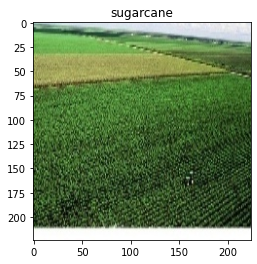

In [54]:
predictimage()